## Table of content:
- <a href = '#Import libraries'>Import libraries</a>
- <a href = '#Read Dataset'>Read Dataset</a>
- <a href = '#Preprocessing'>Preprocessing</a>
- <a href = '#Models'>Models</a>

# Import libraries

In [297]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, log_loss
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

import seaborn as sns

# Read Dataset

<a href = 'https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset'>Link to the dataset in Kaggle.</a>
  
- Age: Age of the patient
- Sex: Sex of the patient
- cp: Chest Pain type chest pain type
    - Value 1: typical angina
    - Value 2: atypical angina
    - Value 3: non-anginal pain
    - Value 4: asymptomatic
- trtbps: resting blood pressure (in mm Hg)
- chol: cholesterol in mg/dl fetched via BMI sensor
- fbs: (fasting blood sugar > 120 mg/dl)
    - Value 0: false
    - Value 1: true
- rest_ecg : resting electrocardiographic results
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- thalach: maximum heart rate achieved
- exang: exercise induced angina
    - Value 0: no
    - Value 1: yes
- oldpeak: Previous peak    
- slp: Slope    
- caa: number of major vessels ~ (0-4)
- thall: Thalium Stress Test result ~ (0-3)
- target: 
    - Value 0: less chance of heart attack
    - Value 1: more chance of heart attack

In [298]:
heart_attack = pd.read_csv('heart.csv')
print(f"Shape of dataset: {heart_attack.shape}")
heart_attack.head()

Shape of dataset: (303, 14)


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [299]:
heart_attack.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# Preprocessing

In [300]:
heart_attack.drop_duplicates(inplace = True)
heart_attack.reset_index(drop = True, inplace= True)

print(f"Shape of dataset after removing duplicate rows: {heart_attack.shape}")

Shape of dataset after removing duplicate rows: (302, 14)


In [301]:
def lower_upper(x):
    Q1 = np.percentile(heart_attack[x], 25)
    Q3 = np.percentile(heart_attack[x], 75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return lower, upper

def stat_properties(x):
    lower, upper = lower_upper(x)
    print(f'Statistical properties for {x} is:')
    print(f"lower quartile is: {lower:0.2f} and upper quartile is: {upper:0.2f}.")
    print(f"mean is: {heart_attack[x].mean():0.2f}, std is: {heart_attack[x].std():0.2f}, skewness is: {heart_attack[x].skew():0.2f}, and kurtosis is: {heart_attack[x].kurtosis():0.2f}.")
    print("-" * 20)

In [302]:
continuous_feature = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

for i in continuous_feature:
    stat_properties(i)

Statistical properties for age is:
lower quartile is: 28.50 and upper quartile is: 80.50.
mean is: 54.42, std is: 9.05, skewness is: -0.20, and kurtosis is: -0.53.
--------------------
Statistical properties for trtbps is:
lower quartile is: 90.00 and upper quartile is: 170.00.
mean is: 131.60, std is: 17.56, skewness is: 0.72, and kurtosis is: 0.92.
--------------------
Statistical properties for chol is:
lower quartile is: 115.38 and upper quartile is: 370.38.
mean is: 246.50, std is: 51.75, skewness is: 1.15, and kurtosis is: 4.54.
--------------------
Statistical properties for thalachh is:
lower quartile is: 84.12 and upper quartile is: 215.12.
mean is: 149.57, std is: 22.90, skewness is: -0.53, and kurtosis is: -0.06.
--------------------
Statistical properties for oldpeak is:
lower quartile is: -2.40 and upper quartile is: 4.00.
mean is: 1.04, std is: 1.16, skewness is: 1.27, and kurtosis is: 1.57.
--------------------


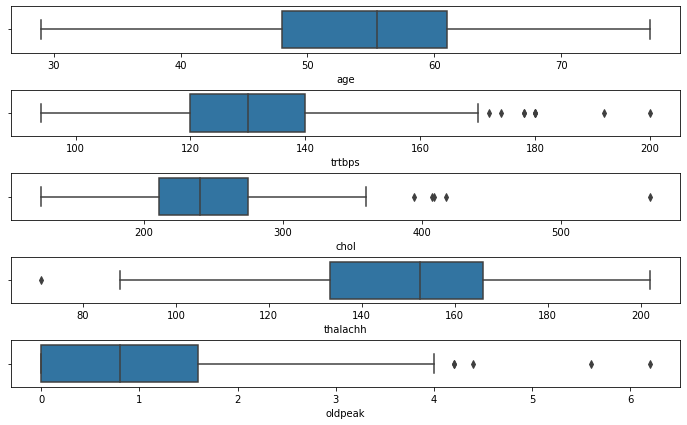

In [303]:
fig, ax = plt.subplots(len(continuous_feature), 1, figsize = (12,7))

for i,j in zip(range(0, len(continuous_feature)), continuous_feature):
    sns.boxplot(ax = ax[i], x = heart_attack[j])
plt.subplots_adjust(hspace = 0.8)    

In [304]:
# Removing the outliers.

heart_attack_without_outliers = heart_attack.copy()

outliers_index = list(np.where((heart_attack['trtbps']> 180) | 
                          (heart_attack['chol']> 500) | 
                          (heart_attack['oldpeak']> 5.0)
                         )[0])

heart_attack_without_outliers.drop(index = outliers_index, inplace = True)
heart_attack_without_outliers.reset_index(drop = True, inplace = True)

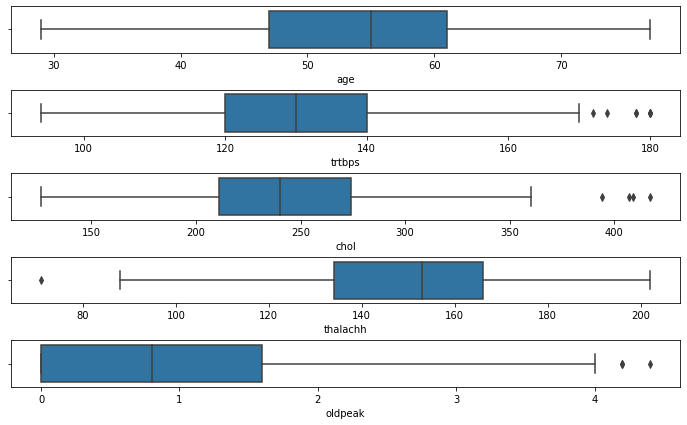

In [305]:
fig, ax = plt.subplots(len(continuous_feature), 1, figsize = (12,7))

for i,j in zip(range(0, len(continuous_feature)), continuous_feature):
    sns.boxplot(ax = ax[i], x = heart_attack_without_outliers[j])
plt.subplots_adjust(hspace = 0.8) 

# Models

In [306]:
X = np.asarray(heart_attack_without_outliers.drop(columns = ['output']))
y = np.asarray(heart_attack_without_outliers['output'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [307]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [308]:
param_grid_svm = [{'C': [0.1,1,10],
              'kernel': ['linear', 'poly', 'rbf']
              }]
grid_svm = GridSearchCV(SVC(random_state = 0), param_grid = param_grid_svm, refit = True, n_jobs = -1)
grid_svm.fit(X_train_scaled, y_train)

print(f"Best parameter after SVM tuning: {grid_svm.best_params_}")
print('-'*10)

y_pred_svm = grid_svm.predict(X_test_scaled)

print(f"SVM Classification report: {classification_report(y_test, y_pred_svm)}")
print(f"SVM Accuracy: {accuracy_score(y_test, y_pred_svm):0.2f}")
print(f"SVM Cross-entropy loss: {log_loss(y_test, y_pred_svm):0.2f}")

Best parameter after SVM tuning: {'C': 0.1, 'kernel': 'linear'}
----------
SVM Classification report:               precision    recall  f1-score   support

           0       0.96      0.71      0.81        31
           1       0.76      0.97      0.85        29

    accuracy                           0.83        60
   macro avg       0.86      0.84      0.83        60
weighted avg       0.86      0.83      0.83        60

SVM Accuracy: 0.83
SVM Cross-entropy loss: 5.76


In [309]:
param_grid_knn = [{'weights': ['uniform', 'distance'],
                   'n_neighbors': [3,5,7,9]
              }]
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid = param_grid_knn, 
                        refit = True, n_jobs = -1)
grid_knn.fit(X_train_scaled, y_train)

print(f"Best parameter after KNN tuning: {grid_knn.best_params_}")
print('-'*10)

y_pred_knn = grid_knn.predict(X_test_scaled)

print(f"KNN Classification report: {classification_report(y_test, y_pred_knn)}")
print(f"KNN Accuracy: {accuracy_score(y_test, y_pred_knn):0.2f}")
print(f"KNN Cross-entropy loss: {log_loss(y_test, y_pred_knn):0.2f}")

Best parameter after KNN tuning: {'n_neighbors': 5, 'weights': 'uniform'}
----------
KNN Classification report:               precision    recall  f1-score   support

           0       0.96      0.74      0.84        31
           1       0.78      0.97      0.86        29

    accuracy                           0.85        60
   macro avg       0.87      0.85      0.85        60
weighted avg       0.87      0.85      0.85        60

KNN Accuracy: 0.85
KNN Cross-entropy loss: 5.18


In [310]:
param_grid_dtree = [{'criterion': ['gini', 'entropy'],
                     'max_depth': [3,5,7],
              }]
grid_dtree = GridSearchCV(DecisionTreeClassifier(random_state = 0), param_grid = param_grid_dtree, 
                        refit = True, n_jobs = -1)
grid_dtree.fit(X_train_scaled, y_train)

print(f"Best parameter after DeciTree tuning: {grid_dtree.best_params_}")
print('-'*10)

y_pred_dtree = grid_dtree.predict(X_test_scaled)

print(f"DeciTree Classification report: {classification_report(y_test, y_pred_dtree)}")
print(f"DeciTree Accuracy: {accuracy_score(y_test, y_pred_dtree):0.2f}")
print(f"DeciTree Cross-entropy loss: {log_loss(y_test, y_pred_dtree):0.2f}")

Best parameter after DeciTree tuning: {'criterion': 'gini', 'max_depth': 3}
----------
DeciTree Classification report:               precision    recall  f1-score   support

           0       0.79      0.74      0.77        31
           1       0.74      0.79      0.77        29

    accuracy                           0.77        60
   macro avg       0.77      0.77      0.77        60
weighted avg       0.77      0.77      0.77        60

DeciTree Accuracy: 0.77
DeciTree Cross-entropy loss: 8.06


In [311]:
param_lr = [{'penalty': ['l1','l2','elasticnet'],
             'C': [0.1,1,10],
             'solver': ['lbfgs','liblinear']
              }]
grid_lr = GridSearchCV(LogisticRegression(random_state = 0), param_grid = param_lr, 
                        refit = True, n_jobs = -1)
grid_lr.fit(X_train_scaled, y_train)

print(f"Best parameter after LogisticRegression tuning: {grid_lr.best_params_}")
print('-'*10)

y_pred_lr = grid_lr.predict(X_test_scaled)

print(f"LogisticRegression Classification report: {classification_report(y_test, y_pred_lr)}")
print(f"LogisticRegression Accuracy: {accuracy_score(y_test, y_pred_lr):0.2f}")
print(f"LogisticRegression Cross-entropy loss: {log_loss(y_test, y_pred_lr):0.2f}")

Best parameter after LogisticRegression tuning: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
----------
LogisticRegression Classification report:               precision    recall  f1-score   support

           0       0.96      0.77      0.86        31
           1       0.80      0.97      0.88        29

    accuracy                           0.87        60
   macro avg       0.88      0.87      0.87        60
weighted avg       0.88      0.87      0.87        60

LogisticRegression Accuracy: 0.87
LogisticRegression Cross-entropy loss: 4.61


C:\Users\Alireza\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:925: UserWarning: One or more of the test scores are non-finite: [       nan 0.82677305 0.81843972 0.8141844         nan        nan
        nan 0.81843972 0.82269504 0.82269504        nan        nan
        nan 0.81843972 0.81843972 0.81843972        nan        nan]
  category=UserWarning


In [312]:
model_metrics = pd.DataFrame({'Accuracy': [accuracy_score(y_test, y_pred_lr),accuracy_score(y_test, y_pred_knn),
                                           accuracy_score(y_test, y_pred_svm),accuracy_score(y_test, y_pred_dtree)],
                              'Cross-entropy loss': [log_loss(y_test, y_pred_lr),log_loss(y_test, y_pred_knn),
                                                     log_loss(y_test, y_pred_svm),log_loss(y_test, y_pred_dtree)]},
                              index = ['LogisticRegression', 'KNeighborsClassifier', 'SVM', 'DecisionTreeClassifier']) 
model_metrics

,Accuracy,Cross-entropy loss
LogisticRegression,0.866667,4.605263
KNeighborsClassifier,0.850000,5.180923
SVM,0.833333,5.756583
DecisionTreeClassifier,0.766667,8.059154


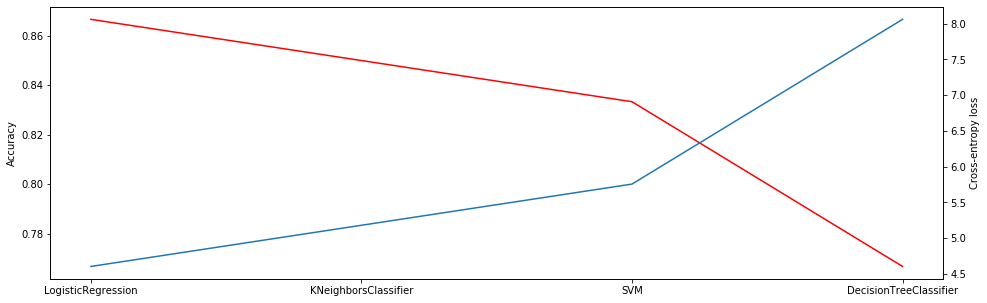

In [313]:
fig, ax = plt.subplots(1,1,figsize = (16,5))

ax = sns.lineplot(data = model_metrics['Accuracy'], color = 'r')

ax_new = ax.twinx()
ax_new = sns.lineplot(data = model_metrics['Cross-entropy loss'])

## Select model
The above plot shows that LogisticRegression is the best model for training. Because it has the lowest cross-entropy loss and the highest accuracy between models.